In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import numpy as np

Loads the station for the gravity model to use

In [2]:
df_citty = pd.read_csv('cittyWInfo.csv')
display(df_citty)

df_citty['status_3_ratio_mean'] = df_citty['status_3_ratio_mean']*df_citty['ratios_length']*17

#sort by status_3_ratio_mean
df_citty = df_citty.sort_values(by='status_3_ratio_mean', ascending=True)
display(df_citty[['Unnamed: 0','longitude', 'latitude', 'status_3_ratio_mean']])
df_citty[['Unnamed: 0','longitude', 'latitude', 'status_3_ratio_mean']].to_csv('citty.csv', index=False)


,Unnamed: 0.1,Unnamed: 0,slug,status_3_ratio_mean,status_3_ratio_var,latitude,longitude,ratios,ratios_length,minCapacity,maxCapacity,NAME_2
0,0,329,x5623z,0.759760,0.182567,55.732861,12.386630,[0.7597597597597597],1,50.0,50.0,Ballerup
1,1,47,5nykwy,0.579191,0.243785,55.858522,9.851593,[0.5791907514450867],1,75.0,75.0,Horsens
2,2,12,2j72qy,0.540725,0.150718,55.614600,12.355200,"[0.5385325334563913, 0.5429164743885556]",2,43.0,50.0,Ishøj
3,3,315,wj3qw6,0.512125,0.064865,55.676120,12.559046,"[0.6290435187340004, 0.533395392134047, 0.6032...",5,11.0,50.0,København
4,4,97,7w9qrp,0.494912,0.140039,56.182788,10.103635,"[0.4364014801110083, 0.553422756706753]",2,22.0,50.0,Århus
...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,267,pz5kg3,0.010855,0.005311,55.130120,9.129680,"[0.008545034642032332, 0.013163972286374134]",2,43.0,50.0,Tønder
262,262,90,7nyr93,0.009227,0.009144,56.781975,8.836123,[0.00922722029988466],1,50.0,50.0,Morsø
263,263,349,y67jq,0.008146,0.002712,56.964766,9.241929,"[0.0349002849002849, 0.002849002849002849, 0.0...",5,11.0,150.0,Vesthimmerland
264,264,46,5np96k,0.007568,0.003728,57.061677,10.182387,"[0.0122537241710716, 0.0028832292167227293]",2,90.0,90.0,Aalborg


,Unnamed: 0,longitude,latitude,status_3_ratio_mean
262,90,8.836123,56.781975,0.156863
264,46,10.182387,57.061677,0.257328
261,267,9.129680,55.130120,0.369053
265,31,11.342991,55.414030,0.441866
258,81,9.911765,56.359149,0.491855
...,...,...,...,...
71,246,10.061784,56.430273,70.823307
11,299,12.504799,55.772665,90.901028
33,215,10.426722,55.386511,93.891313
124,73,10.063318,56.429629,94.527160


Diffiens the goals of the gravity model

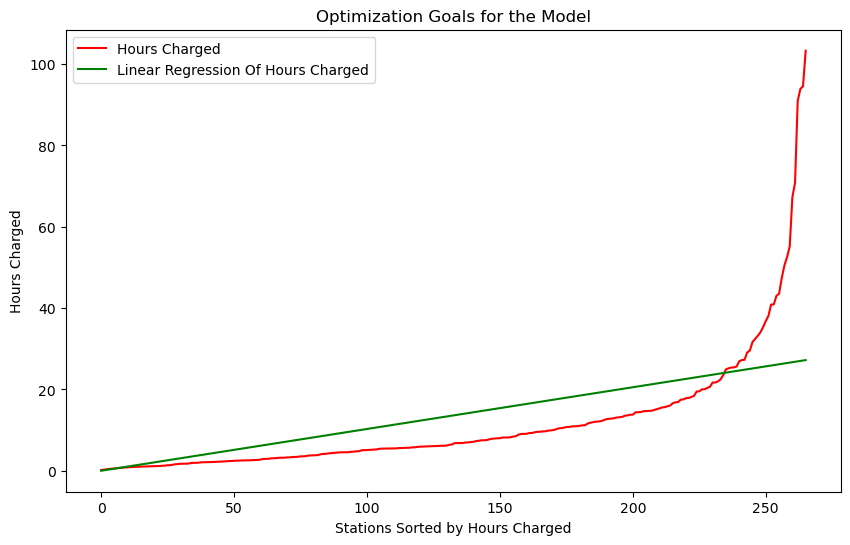

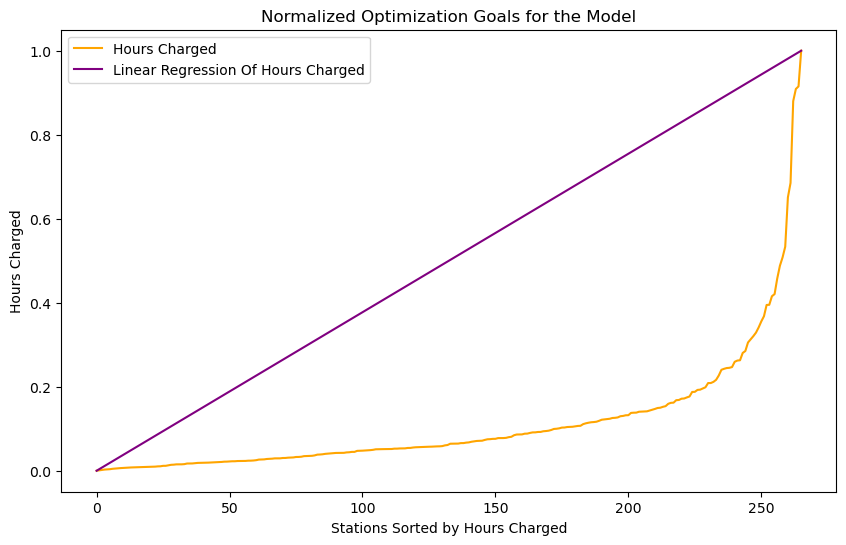

In [3]:
X = np.arange(len(df_citty)).reshape(-1, 1)  # Element numbers as X
y_original = df_citty['status_3_ratio_mean'].values.reshape(-1, 1)  # status_3_ratio_mean as Y, reshaped for scaler

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y_original)

# Fit the model
model = LinearRegression(fit_intercept=False)
model.fit(X, y_original)

# Predict using the scaled features
y_lin = model.predict(X)
y_scaled_lin = scaler_y.fit_transform(y_lin)

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.plot(X, y_original, color='red', label='Hours Charged')
plt.plot(X, y_lin, color='green', label='Linear Regression Of Hours Charged')

plt.title('Optimization Goals for the Model')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.plot(X, y_scaled, color='orange', label='Hours Charged')
plt.plot(X, y_scaled_lin, color='purple', label='Linear Regression Of Hours Charged')

plt.title('Normalized Optimization Goals for the Model')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()

Runs the gravity model and give the results

C++ program output:
 Time taken: 5292 milliseconds



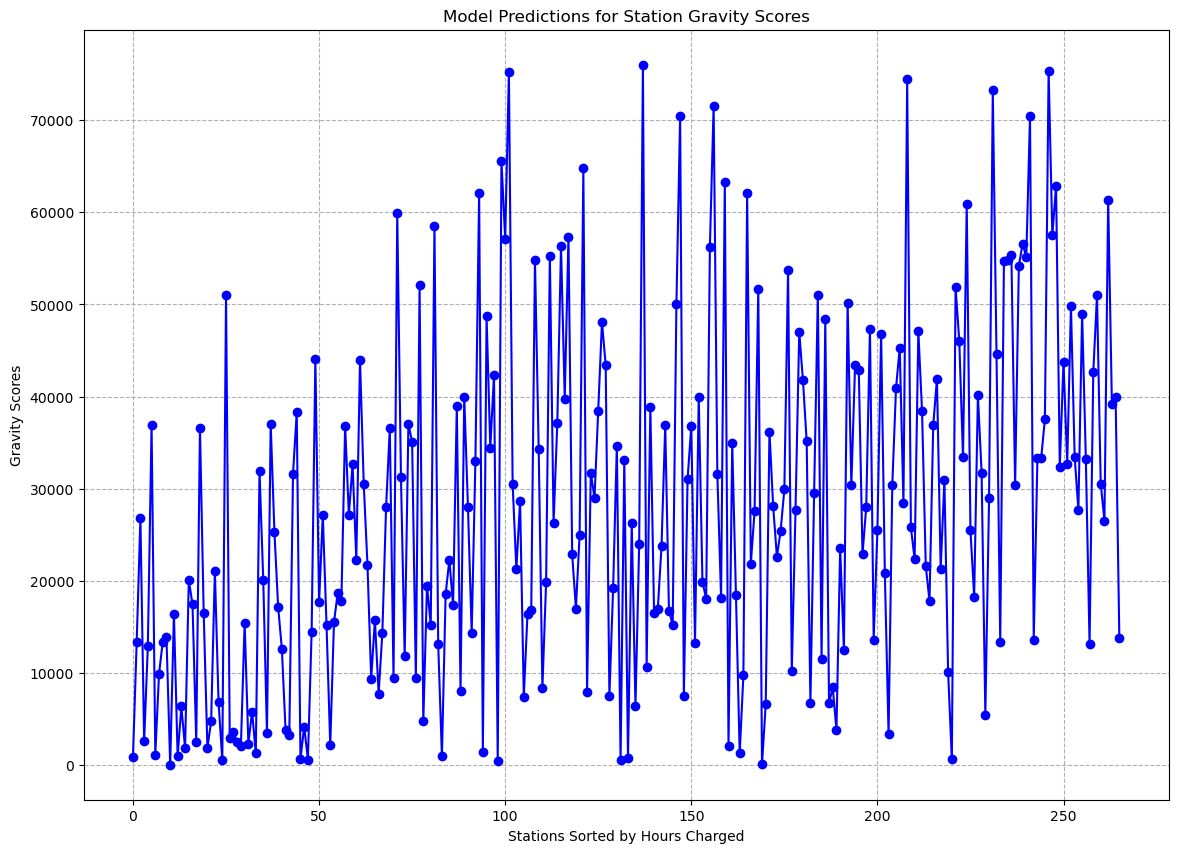

Mean Squared Error (MSE) on scaled data: 0.1277254067791431
Root Mean Squared Error (RMSE) on scaled data: 0.35738691467252


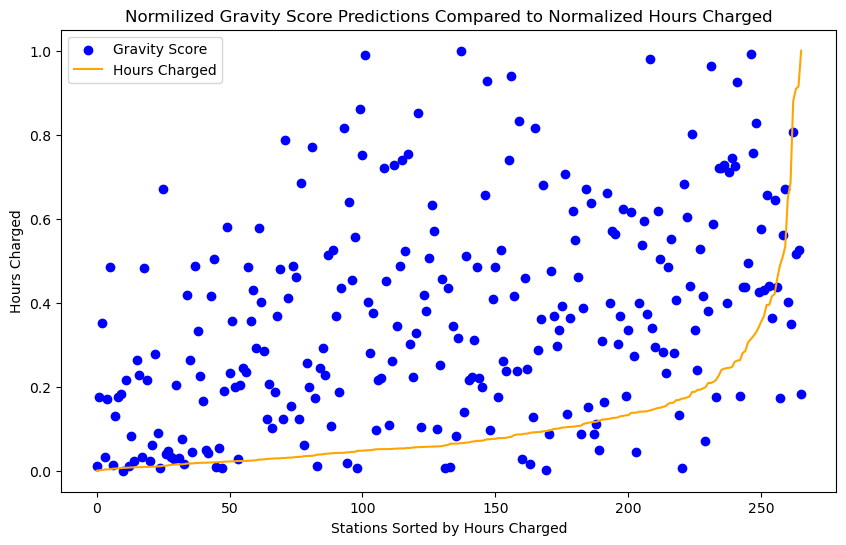

Mean Squared Error (MSE) on scaled data: 0.10586683305210894
Root Mean Squared Error (RMSE) on scaled data: 0.3253718381361683


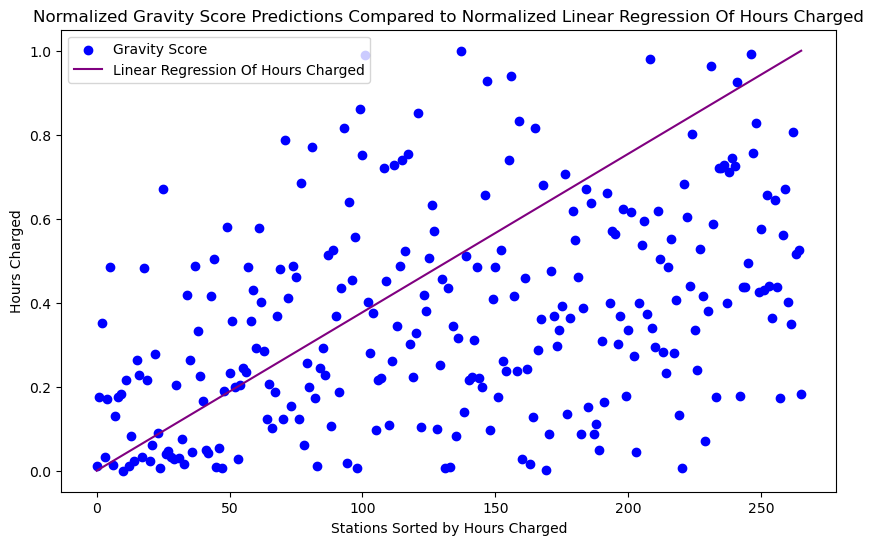

In [4]:
weights = {
"traffic_weight": 163.85385541347304,
"apartments_weight": 50.22955270367241,
"cinemas_weight": 0.7763408177299956,
"clinics_weight": 163.37827338705705,
"colleges_weight": 33.529536354590775,
"communityCentres_weight": 6.014113558513104,
"conferenceCentres_weight": 219.13331788159817,
"dentists_weight": 0.9716146911647117,
"eventsVenues_weight": 0.36281282650985114,
"fastFoods_weight": 202.44326553763074,
"hospitals_weight": 22.661898399170035,
"hotels_weight": 2.0081849756997054,
"leisureFitnessCentres_weight": 41.74197415863212,
"leisureStadiums_weight": 52.19871648583238,
"placesOfWorship_weight": 58.861586266528576,
"restaurants_weight": 88.69583325654665,
"shopMalls_weight": 6.634250710648821,
"shopSupermarkets_weight": 89.28285577188296,
"sportsCentres_weight": 101.63189788739884,
"sportsHalls_weight": 32.07111790546567,
"stadiums_weight": 51.30571670651456,
"substationMinorDistributions_weight": 85.70437433460862,
"theatres_weight": 0,
"universities_weight": 0,

}
with open("weights_float.txt", "w") as file:
    for name, value in weights.items():
        file.write(f"{name} {float(value)}\n")


# Define the path to the compiled executable
executable_path = './gravityscore'

# The CSV file name to pass as an argument
csv_file_name = 'citty.csv'

# Run the compiled C++ program with the CSV file name as an argument
result = subprocess.run([executable_path, csv_file_name], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

# Process the result
if result.returncode == 0:
    print("C++ program output:\n", result.stdout)
else:
    print("Error running C++ program:\n", result.stderr)

df_gravity = pd.read_csv('gravityScoresWithDetails.csv')
#change all gravity that a negative to zero
df_gravity['gravity'] = df_gravity['gravity'].apply(lambda x: 0 if x < 0 else x)

#plot df_gravity where x asis the the index and y axis the gravity
plt.figure(figsize=(14, 10))
plt.plot(df_gravity.index, df_gravity['gravity'], marker='o', linestyle='-', color='blue')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Gravity Scores')
plt.title('Model Predictions for Station Gravity Scores')
plt.grid(True, which="both", ls="--")
plt.show()

X = np.arange(len(df_citty)).reshape(-1, 1)  # Element numbers as X
y = df_gravity['gravity'].values.reshape(-1, 1)
#y = df_reordered_sorted['status_3_ratio_mean'].values.reshape(-1, 1)  # status_3_ratio_mean as Y, reshaped for scaler


scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_gravity_scaled = scaler_y.fit_transform(y)


# Calculate MSE on the scaled predictions
mse_scaled = mean_squared_error(y_gravity_scaled, y_scaled)
rmse = np.sqrt(mse_scaled)

mse = mean_squared_error(y, y_original)

print(f"Mean Squared Error (MSE) on scaled data: {mse_scaled}")
print(f"Root Mean Squared Error (RMSE) on scaled data: {rmse}")


# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(X, y_gravity_scaled, color='blue', label='Gravity Score')
plt.plot(X, y_scaled, color='orange', label='Hours Charged')
plt.title('Normilized Gravity Score Predictions Compared to Normalized Hours Charged')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()


# Calculate MSE on the scaled predictions
mse_scaled = mean_squared_error(y_gravity_scaled, y_scaled_lin)
rmse = np.sqrt(mse_scaled)

# If you want to calculate MSE on the original scale
mse = mean_squared_error(y, y_original)

print(f"Mean Squared Error (MSE) on scaled data: {mse_scaled}")
print(f"Root Mean Squared Error (RMSE) on scaled data: {rmse}")

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(X, y_gravity_scaled, color='blue', label='Gravity Score')
plt.plot(X, y_scaled_lin, color='purple', label='Linear Regression Of Hours Charged')
plt.title('Normalized Gravity Score Predictions Compared to Normalized Linear Regression Of Hours Charged')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()
